In [102]:
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np 
import pandas as pd

In [130]:
import os
import re 

files = {os.path.splitext(k)[0]: {} for k in os.listdir('data') if '.csv' in os.path.splitext(k)[1]}


for i,file in enumerate(os.listdir('data')):
    ext = os.path.splitext(file)[1]
    name = os.path.splitext(file)[0]
    if '.csv' in ext:
        df = pd.read_csv(f'data/{file}')
        files[name] = df


In [128]:
files.keys()

dict_keys(['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', 'data_ej_4_18', 'data_ej_4_20', 'data_ej_4_a', 'data_ej_4_b', 'data_ej_4_c', 'data_ej_4_d', 'data_ej_4_f', 'data_ej_5_a', 'data_ej_5_b', 'data_ej_5_c', 'data_ej_5_d', '.csv'])

In [105]:
import seaborn as sns
plt.style.use('seaborn-darkgrid')

## Ejercicio 4
### (a) Barrido de frecuencias

In [76]:
df4a = files['data_ej_4_a']
df4a.columns[1]

'frec'

In [150]:
ej4 = np.array([int(ej) for ej in files.keys() if 'ej' not in ej])
ej4 = np.linspace(21,29,5,dtype=int)
ej4

array([21, 23, 25, 27, 29])

In [155]:
frecs = ej4
def hz(frec):
    hz_ = 1/(2 * np.pi * (2 ** frec ) * 8 )*1e9
    return hz_
hz(frecs)

array([9.48637385, 2.37159346, 0.59289837, 0.14822459, 0.03705615])

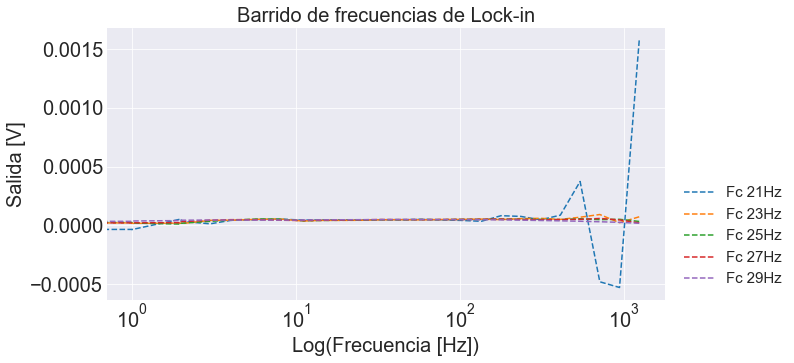

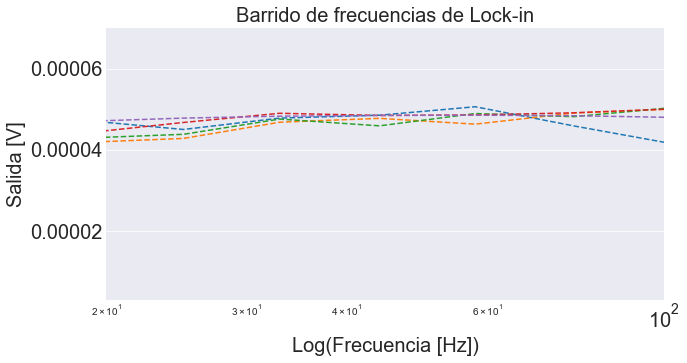

In [153]:
plt.figure(figsize=(10,5))
for i,ej in enumerate(ej4): 
    plt.semilogx(files[f'{ej}']['frec'],files[f'{ej}']['X'],'-',label=f'Fc {frecs[i]}Hz', ls= 'dashed')
    plt.ylabel(r'Salida [V]',fontsize=20)
    plt.xlabel(f'Log(Frecuencia [Hz])',fontsize=20)
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)
    plt.title(f"Barrido de frecuencias de Lock-in",fontsize=20)
    plt.legend(fontsize=15,loc='lower left', bbox_to_anchor=(1.01, 0))
      
plt.figure(figsize=(10,5))
for i,ej in enumerate(ej4): 
    plt.semilogx(files[f'{ej}']['frec'],files[f'{ej}']['X'],label=f'Fc {frecs[i]}Hz', ls= 'dashed')
    plt.ylabel(r'Salida [V]',fontsize=20)
    plt.xlabel(f'Log(Frecuencia [Hz])',fontsize=20)
    plt.ylim([0.000003,0.00007])
    plt.xlim([20,100])
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)
    plt.title(f"Barrido de frecuencias de Lock-in",fontsize=20)
                 


### (b) Lock in en funcion de frecuencias

In [79]:
df4b = files['data_ej_4_b']
df4b.columns

Index(['Unnamed: 0', 'amp', 'X', 'Y'], dtype='object')

Text(0.5, 1.0, 'Respuesta del Lock-in a 102Hz en función de la amplitud')

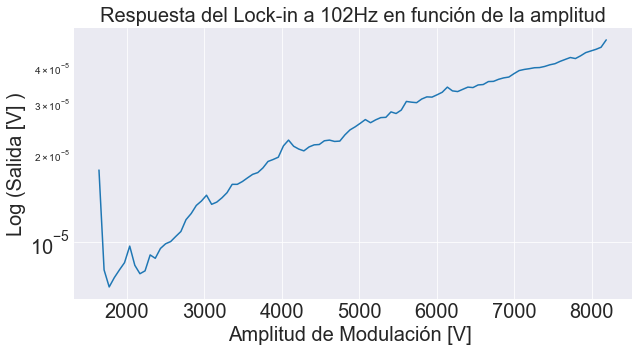

In [80]:
plt.figure(figsize=(10,5))
plt.semilogy(df4b['amp'],df4b['X'])
plt.ylabel(r'Log (Salida [V] )',fontsize=20)
plt.xlabel(r'Amplitud de Modulación [V] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.title(f"Respuesta del Lock-in a 102Hz en función de la amplitud",fontsize=20)

## Ejercicio 5
### (a) fc 22 y orden 1

In [159]:
def RT(df):
    X = df['X']
    Y = df['Y']
    R = np.sqrt(X**2 + Y**2)
    T = np.arctan(Y/X)
    return R,T

In [158]:
df5a = files['data_ej_5_a']
df5a.columns

Index(['Unnamed: 0', 'Tiempo', 'X', 'Y'], dtype='object')

Text(0.5, 1.0, 'Filtro pasabajos de orden 1 con Frecuencia de corte 4.743186923619966Hz')

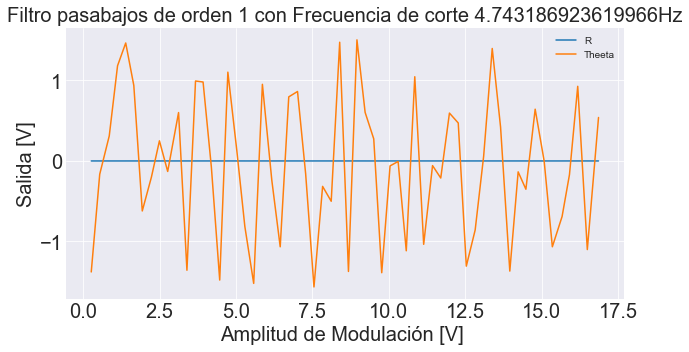

In [160]:
R,T = RT(df5a)
plt.figure(figsize=(10,5))
plt.plot(df5a['Tiempo'],R,label='R')
plt.plot(df5a['Tiempo'],T,label='Theeta')
plt.ylabel(r'Salida [V]',fontsize=20)
plt.xlabel(r'Amplitud de Modulación [V] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.legend(fontsize=10)
plt.title(f"Filtro pasabajos de orden 1 con Frecuencia de corte {hz(22)}Hz",fontsize=20)

### (b) fc 22 orden 2

In [161]:
df5b = files['data_ej_5_b']
df5b.columns

Index(['Unnamed: 0', 'Tiempo', 'X', 'Y'], dtype='object')

Text(0.5, 1.0, 'Filtro pasabajos de orden 1 con Frecuencia de corte 22HzARReglar')

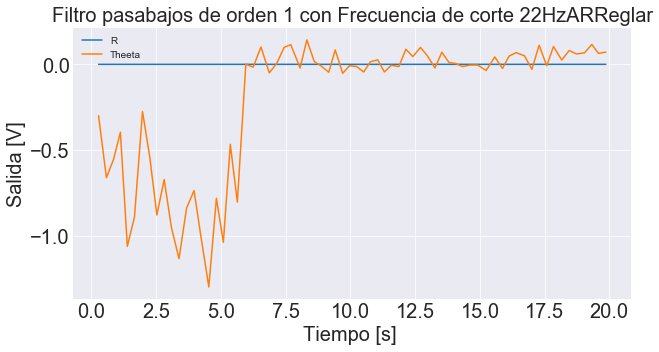

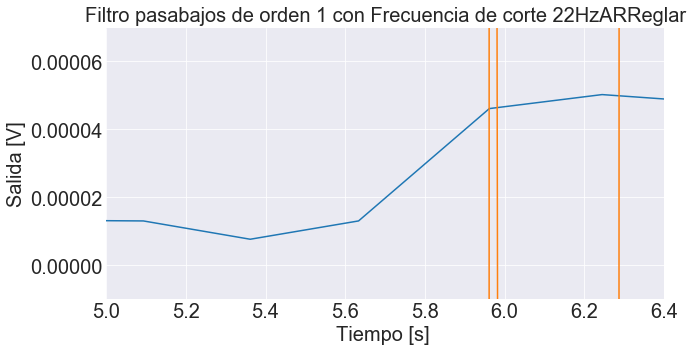

In [180]:
R,T = RT(df5b)
plt.figure(figsize=(10,5))
plt.plot(df5b['Tiempo'],R,label='R')
plt.plot(df5b['Tiempo'],T,label='Theeta')
plt.ylabel(r'Salida [V]',fontsize=20)
plt.xlabel(r'Tiempo [s] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.ylim([-0.0005,0.0005])
plt.legend(fontsize=10)
plt.title("Filtro pasabajos de orden 1 con Frecuencia de corte 22HzARReglar",fontsize=20)


plt.figure(figsize=(10,5))
plt.plot(df5b['Tiempo'],R,label='R')
plt.plot(df5b['Tiempo'],T,label='Theeta')
plt.ylabel(r'Salida [V]',fontsize=20)
plt.xlabel(r'Tiempo [s] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.ylim([-0.00001,0.00007])
plt.xlim([5,6.4])
plt.title("Filtro pasabajos de orden 1 con Frecuencia de corte 22HzARReglar",fontsize=20)

### (c) fc 25 orden 2

In [171]:
df5c = files['data_ej_5_c']
df5c.columns

Index(['Unnamed: 0', 'Tiempo', 'X', 'Y'], dtype='object')

Text(0.5, 1.0, 'Filtro pasabajos de orden 1 con Frecuencia de corte 22HzARReglar')

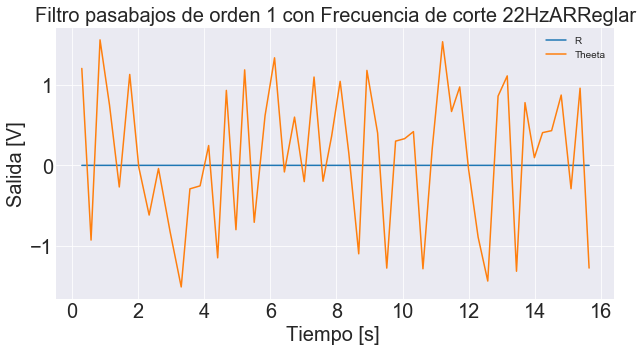

In [181]:
R,T = RT(df5c)
plt.figure(figsize=(10,5))
plt.plot(df5c['Tiempo'],R,label='R')
plt.plot(df5c['Tiempo'],T,label='Theeta')
plt.ylabel(r'Salida [V]',fontsize=20)
plt.xlabel(r'Tiempo [s] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.legend(fontsize=10)
#plt.ylim([-0.0001,0.0002])
#plt.xlim([2,4])
plt.title("Filtro pasabajos de orden 1 con Frecuencia de corte 22HzARReglar",fontsize=20)

### (d) fc 29 orden 2

In [176]:
df5d = files['data_ej_5_d']
df5d.columns


Index(['Unnamed: 0', 'Tiempo', 'X', 'Y'], dtype='object')

Text(0.5, 1.0, 'Filtro pasabajos de orden 1 con Frecuencia de corte 22HzARReglar')

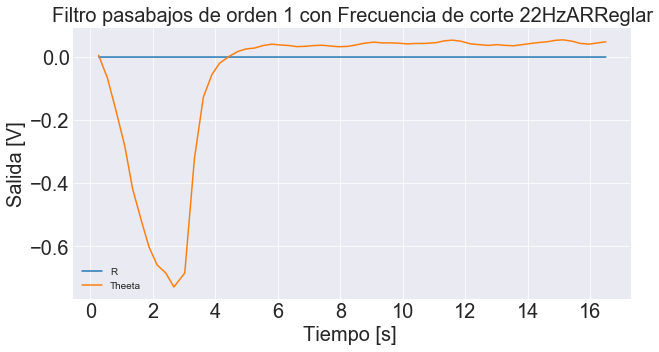

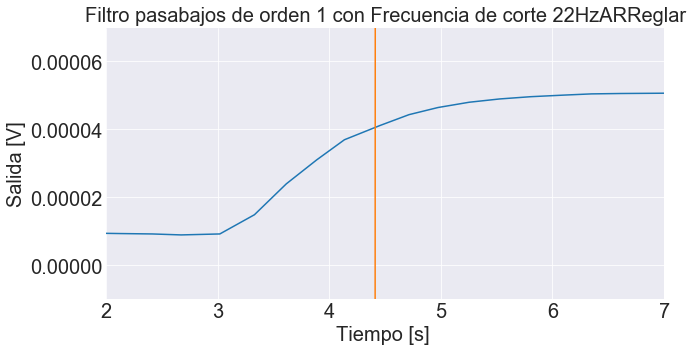

In [182]:
R,T = RT(df5d)
plt.figure(figsize=(10,5))
plt.plot(df5d['Tiempo'],R,label='R')
plt.plot(df5d['Tiempo'],T,label='Theeta')
plt.ylabel(r'Salida [V]',fontsize=20)
plt.xlabel(r'Tiempo [s] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.ylim([-0.001,0.001])
plt.legend(fontsize=10)
plt.title("Filtro pasabajos de orden 1 con Frecuencia de corte 22HzARReglar",fontsize=20)

plt.figure(figsize=(10,5))
plt.plot(df5d['Tiempo'],R,label='R')
plt.plot(df5d['Tiempo'],T,label='Theeta')
plt.ylabel(r'Salida [V]',fontsize=20)
plt.xlabel(r'Tiempo [s] ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
plt.ylim([-0.00001,0.00007])
plt.xlim([2,7])
plt.title("Filtro pasabajos de orden 1 con Frecuencia de corte 22HzARReglar",fontsize=20)
